In [1]:
# 판다스 임포트
import pandas as pd

In [2]:
#csv 파일 읽기
df_bond = pd.read_csv('total_ngram.csv', encoding='utf-8', engine='python')

In [3]:
df_bond.head()

,date,n-gram,label
0,2017-12-27,"은행채/NNG;신용스프레드/NNG;확대/NNG,신용스프레드/NNG;하향/NNG;안정...",상승
1,2017-12-26,"기대/NNG;글로벌/NNG;금리/NNG;상승/NNG,하락/NNG;예상/NNG;금리/...",상승
2,2017-12-20,"국고채/NNG;금리/NNG;급등/NNG,원금/NNG;상환/NNG;부담/NNG,금리/...",상승
3,2017-12-20,"금리/NNG;인상/NNG;반대/NNG,희박/NNG;금리/NNG;인상/NNG,아직/M...",상승
4,2017-12-18,"크레딧/NNG;시장/NNG;스프레드/NNG;축소/NNG,전망/NNG;상향/NNG;전...",상승


In [4]:
# 정규표현식으로 스페이스바 제거
import re
for i in range(len(df_bond)):

    df_bond.loc[i, 'n-gram'] = re.sub(' ', '', df_bond.loc[i, 'n-gram'])
    if i%100 == 0:
        print(i)

0
100


KeyboardInterrupt: 

In [5]:
# ngram파일 저장
df_bond.head()
df_bond.to_csv('190725_ngram(빈칸삭제ver).csv')

KeyboardInterrupt: 

In [18]:
#Pos n-gram 추출
list_up=[]
for ngram in df_bond[df_bond['label']=='상승']['n-gram']:
    list_up.extend(ngram.split(','))
tmp_df = pd.DataFrame(list_up, columns=['상승'])
up_df=pd.DataFrame(tmp_df['상승'].value_counts())

In [19]:
#Neg n-gram 추출
list_down=[]
for ngram in df_bond[df_bond['label']=='하락']['n-gram']:
    list_down.extend(ngram.split(','))
tmp_df = pd.DataFrame(list_down, columns=['하락'])
down_df=pd.DataFrame(tmp_df['하락'].value_counts())

In [20]:
#n-gram을 기준으로 합병하기 위해 인덱스 칼럼으로 뺌
up_df=up_df.reset_index()
down_df=down_df.reset_index()

#병합.
updown_df=pd.merge(up_df,down_df,how='outer') #outer로 하여 한쪽만 있는 값이 있어도 데이터프레임에 삽입할 수 있게함.
updown_df=updown_df.rename({'index':'n-gram'},axis=1)
updown_df=updown_df.set_index('n-gram')

In [21]:
updown_df.head()

,상승,하락
n-gram,,
하/VV,1425627.0,1457492.0
하/XSV,758905.0,773492.0
되/VV,633651.0,627721.0
금리/NNG,623598.0,619403.0
상승/NNG,300098.0,283484.0


In [22]:
updown_df = updown_df[updown_df['상승'] + updown_df['하락'] >= 15]

In [23]:
updown_df.tail()

,상승,하락
n-gram,,
전망/NNG;성장률/NNG;전망/NNG;하향/NNG,1.0,15.0
복근/NNG,1.0,21.0
색스/NNG,1.0,32.0
둔화/NNG;고용/NNG;증가/NNG,1.0,24.0
사회적책임투자/NNG,1.0,15.0


In [24]:
# nan값 채우기
updown_df.fillna(1)

,상승,하락
n-gram,,
하/VV,1425627.0,1457492.0
하/XSV,758905.0,773492.0
되/VV,633651.0,627721.0
금리/NNG,623598.0,619403.0
상승/NNG,300098.0,283484.0
보/VV,287411.0,285598.0
되/XSV,260239.0,250979.0
있/VV,252117.0,256318.0
달러/NNG,247231.0,251559.0


In [26]:
#총 Pos, Neg 계산
tot_pos=sum(updown_df['상승'])
tot_neg=sum(updown_df['하락'])

In [27]:
#NBC 칼럼 추가, NBC 값 추가
updown_df.loc[:,'nbc']=0

for idx in updown_df.index:
    updown_df.loc[idx,'nbc']=(updown_df.loc[idx,'상승']/tot_pos)/(updown_df.loc[idx,'하락']/tot_neg)

In [28]:
updown_df.head()

,상승,하락,nbc
n-gram,,,
하/VV,1425627.0,1457492.0,0.978525
하/XSV,758905.0,773492.0,0.981530
되/VV,633651.0,627721.0,1.009847
금리/NNG,623598.0,619403.0,1.007172
상승/NNG,300098.0,283484.0,1.059026


In [31]:
updown_df = updown_df.sort_values(['nbc'],ascending=[False])

In [35]:
df_up = updown_df[updown_df['nbc'] > 1.3]
df_up.tail()

,상승,하락,nbc
n-gram,,,
배재/NNG,65.0,50.0,1.300516
계절적/VAX,1613.0,1241.0,1.300274
도청/NNG,399.0,307.0,1.300190
가져야/VV,807.0,621.0,1.300032
게/NNG,256.0,197.0,1.300008


In [36]:
dic_up = list(df_up.index)
dic_up

['기요틴/NNG',
 '수출/NNG;유가/NNG;하락/NNG',
 '수소탄/NNG',
 '하락/NNG;확장/NNG',
 '포식자/NNG',
 '선보인다는/VV',
 '해안포/NNG',
 '종료/NNG;일시적/VAX',
 '불안/NNG;위안/NNG;절하/NNG',
 '금융위기/NNG;오르/VV',
 '소비/NNG;회복/NNG;미약/NNG',
 '가계/NNG;부채/NNG;경제/NNG;부담/NNG',
 '금리/NNG;내리/VV;대출/NNG;금리/NNG;내리/VV',
 '억눌려진/VV',
 '수출/NNG;회복/NNG;긍정적/VAX',
 '규제비용총량제/NNG',
 '할려고/XSV',
 '편다고/VV',
 '통화정책/NNG;쉽/VA',
 '경제/NNG;아직/MAG;성장/NNG',
 '부동산/NNG;문제/NNG;심상/NNG;않/VX',
 '애쓴다/VV',
 '금리/NNG;오르/VV;얼마나/MAG;오르/VV',
 '폰지게임/NNG',
 '콜/NNG;금리/NNG;목표/NNG;상향/NNG',
 '자금/NNG;조달/NNG;제한/NNG',
 '소비자/NNG;물가/NNG;인플레이션/NNG;압력/NNG',
 '회복/NNG;국제/NNG;유가/NNG;하락/NNG',
 'ecb/NNG;fed/NNG;금리/NNG;인하/NNG',
 '만기상환금액/NNG',
 '저축/NNG;상승/NNG',
 '수출/NNG;부진/NNG;경제/NNG;성장/NNG',
 'fed/NNG;신용경색/NNG;확산/NNG',
 '금리/NNG;인상/NNG;통화/NNG;증가/NNG',
 '수요/NNG;하방/NNG',
 '취업자/NNG;증가/NNG;축소/NNG',
 '심벌/NNG',
 '양호/NNG;긍정적/VAX',
 '潮流/NNG',
 '절하/NNG;금리/NNG;상승/NNG',
 '회복/NNG;경기/NNG;부진/NNG',
 '예상/NNG;넘/VV;금리/NNG;인상/NNG',
 '환매/NNG;가격/NNG;산정/NNG;일시/MAG;중단/NNG',
 '저축채권/NNG',
 '개선/NNG;차질/NNG',
 '고성장/NNG;아니/VC

In [37]:
df_down = updown_df[updown_df['nbc'] < 0.76]
df_down.head()

,상승,하락,nbc
n-gram,,,
기자/NNG,12225.0,16092.0,0.759996
잔금대출/NNG,120.0,158.0,0.759795
무/NNG,60.0,79.0,0.759795
심경/NNG,41.0,54.0,0.759560
수입관세/NNG,41.0,54.0,0.759560


In [38]:
dic_down = list(df_down.index)
dic_down

['기자/NNG',
 '잔금대출/NNG',
 '무/NNG',
 '심경/NNG',
 '수입관세/NNG',
 '군침/NNG',
 '기분/NNG',
 '개회사/NNG',
 '전망/NNG;우려/NNG',
 '재판부/NNG',
 '금리/NNG;인하/NNG;가능성/NNG;높/VA',
 '인상/NNG;미루/VV',
 '교육장/NNG',
 '오재/NNG',
 '신용등급간/NNG',
 '악순환/NNG;빠지/VV',
 '또래/NNG',
 '입법부/NNG',
 'gdp/NNG;성장률/NNG;전망/NNG;상향/NNG',
 '보름새/NNG',
 '생겨야/VV',
 '끝없이/MAG',
 '에스테이트/NNG',
 '경제/NNG;금리/NNG;오르/VV',
 '얌체/NNG',
 '지표/NNG;저점/NNG',
 '도수/NNG',
 '미술/NNG',
 '만기일시상환/NNG',
 '지칠/VV',
 '악취/NNG',
 '실속형/NNG',
 '선처/NNG',
 '순이자이익/NNG',
 '드레스/NNG',
 '빚더미/NNG',
 '카르텔/NNG',
 '기후/NNG',
 '곳간/NNG',
 '권위/NNG',
 'etf/NNG',
 '프랜차이즈/NNG',
 '피해/NNG;방지/NNG',
 '원격/NNG',
 '푹/MAG',
 '회의장/NNG',
 '금리/NNG;인상/NNG;우려/NNG;완화/NNG',
 '기업회생절차/NNG',
 '투자금액/NNG',
 '매파/NNG;통화/NNG;긴축/NNG;선호/NNG',
 '조달계획/NNG',
 '경쟁기업/NNG',
 '기타공공기관/NNG',
 '가계/NNG;대출/NNG;확대/NNG',
 '안부/NNG',
 '인플레이션/NNG;우려/NNG;금리/NNG;인하/NNG',
 'ism/NNG;제조업/NNG;지수/NNG;예상/NNG;상회/NNG',
 '실업자/NNG;증가/NNG',
 '다가간/VV',
 '세계/NNG;최대/NNG;상승/NNG',
 '어긋난/VV',
 '등기소/NNG',
 '국제/NNG;상품/NNG;가격/NNG;하락/NNG',
 '승소/NNG',
 '공룡/NNG'

In [112]:
len(dic_up)

18233

In [113]:
len(dic_down)

17563

In [61]:
# 수작업 파일을 별도로 남겨둠
up_csv = pd.DataFrame(dic_up)
up_csv.to_csv('updict.csv')

down_csv = pd.DataFrame(dic_down)
down_csv.to_csv('downdict.csv')

re_up = dic_up.copy()
re_down = dic_down.copy()

In [75]:
re_down.remove('기자/NNG')
re_down.remove('개회사/NNG')
re_down.remove('재판부/NNG')
re_down.remove('교육장/NNG')
re_down.remove('입법부/NNG')
re_down.remove('미술/NNG')
re_down.remove('회의장/NNG')
re_down.remove('방문자/NNG')
re_down.remove('사무처장/NNG')
re_down.remove('항공료/NNG')
re_down.remove('공기업/NNG',)
re_down.remove('변리사/NNG')
re_down.remove('우동/NNG')
re_down.remove('교육열/NNG')
re_down.remove('리무진/NNG')
re_down.remove('연금제도/NNG')
re_down.remove('디지털가전/NNG')
re_down.remove('화기애애/NNG')
re_down.remove('6시그마/NNG')
re_down.remove('전력시장/NNG')
re_down.remove('관세사/NNG')
re_down.remove('농진청/NNG')
re_down.remove('국책연구기관/NNG')
re_down.remove('상권/NNG')
re_down.remove('공급계약/NNG')
re_down.remove('물질/NNG')
re_down.remove('실효/NNG')
re_down.remove('유럽연합집행위원회/NNG')
re_down.remove('매매주체/NNG')
re_down.remove('사고방식/NNG')
re_down.remove('승객/NNG')
re_down.remove('한중일/NNG')
re_down.remove('입찰자/NNG')
re_down.remove('그래서/VV')
re_down.remove('직속/NNG')
re_down.remove('앞뒤/NNG')
re_down.remove('합계/NNG')
re_down.remove('판결문/NNG')
re_down.remove('용적률/NNG')
re_down.remove('해변/NNG')
re_down.remove('숭례문/NNG')
re_down.remove('안목/NNG')
re_down.remove('답했/VV')
re_down.remove('가속도/NNG')
re_down.remove('병무청/NNG')

               

               
               


In [54]:
dic_up

['기요틴/NNG',
 '수출/NNG;유가/NNG;하락/NNG',
 '수소탄/NNG',
 '하락/NNG;확장/NNG',
 '포식자/NNG',
 '선보인다는/VV',
 '해안포/NNG',
 '종료/NNG;일시적/VAX',
 '불안/NNG;위안/NNG;절하/NNG',
 '금융위기/NNG;오르/VV',
 '소비/NNG;회복/NNG;미약/NNG',
 '가계/NNG;부채/NNG;경제/NNG;부담/NNG',
 '금리/NNG;내리/VV;대출/NNG;금리/NNG;내리/VV',
 '억눌려진/VV',
 '수출/NNG;회복/NNG;긍정적/VAX',
 '규제비용총량제/NNG',
 '할려고/XSV',
 '편다고/VV',
 '통화정책/NNG;쉽/VA',
 '경제/NNG;아직/MAG;성장/NNG',
 '부동산/NNG;문제/NNG;심상/NNG;않/VX',
 '애쓴다/VV',
 '금리/NNG;오르/VV;얼마나/MAG;오르/VV',
 '폰지게임/NNG',
 '콜/NNG;금리/NNG;목표/NNG;상향/NNG',
 '자금/NNG;조달/NNG;제한/NNG',
 '소비자/NNG;물가/NNG;인플레이션/NNG;압력/NNG',
 '회복/NNG;국제/NNG;유가/NNG;하락/NNG',
 'ecb/NNG;fed/NNG;금리/NNG;인하/NNG',
 '만기상환금액/NNG',
 '저축/NNG;상승/NNG',
 '수출/NNG;부진/NNG;경제/NNG;성장/NNG',
 'fed/NNG;신용경색/NNG;확산/NNG',
 '금리/NNG;인상/NNG;통화/NNG;증가/NNG',
 '수요/NNG;하방/NNG',
 '취업자/NNG;증가/NNG;축소/NNG',
 '심벌/NNG',
 '양호/NNG;긍정적/VAX',
 '潮流/NNG',
 '절하/NNG;금리/NNG;상승/NNG',
 '회복/NNG;경기/NNG;부진/NNG',
 '예상/NNG;넘/VV;금리/NNG;인상/NNG',
 '환매/NNG;가격/NNG;산정/NNG;일시/MAG;중단/NNG',
 '저축채권/NNG',
 '개선/NNG;차질/NNG',
 '고성장/NNG;아니/VC

In [76]:
re_up.remove('심벌/NNG')
re_up.remove('문헌/NNG')
re_up.remove('확성기/NNG')
re_up.remove('세계무역센터/NNG')
re_up.remove('미사리/NNG')
re_up.remove('최종일/NNG')
re_up.remove('손녀/NNG')
re_up.remove('바퀴벌레/NNG')
re_up.remove('출루율/NNG')
re_up.remove('첫눈/NNG')
re_up.remove('시청료/NNG')
re_up.remove('수신기/NNG')
re_up.remove('사자상/NNG')
re_up.remove('노사정위원회/NNG')
re_up.remove('여러/MAG')
re_up.remove('산악회/NNG')
re_up.remove('어패류/NNG')
re_up.remove('발기인/NNG')
re_up.remove('안내견/NNG')
re_up.remove('멧돼지/NNG')
re_up.remove('청년기/NNG')
re_up.remove('계급장/NNG')
re_up.remove('연락사무소/NNG')
re_up.remove('시나리오분석/NNG')
re_up.remove('아무런/VA')

In [39]:
data2 = pd.read_csv('sentence_ngram.csv')
data2.head()

,date,n-gram
0,2005-06-09,"엔달러/NNG;환율/NNG;상승/NNG, 기대/NNG;원화/NNG;절상/NNG, 통..."
1,2005-06-09,"원엔/NNG;환율/NNG;하락/NNG, 일시적/VAX;외부충격/NNG, 하락/NNG..."
2,2005-06-09,"유로존/NNG;경제/NNG;성장/NNG, 실적/NNG;예상/NNG;저조/NNG, 전..."
3,2005-06-09,"자본/NNG;유출/NNG;확대/NNG, 금리/NNG;상승/NNG, 원화/NNG;강세..."
4,2005-06-09,"가계/NNG;대출/NNG;증가/NNG, 주택담보대출/NNG;증가/NNG, 주택가격/..."


In [41]:
data2['tone'] = 0

for i in range(len(data2)):
    ngrams = data2.loc[i, 'n-gram'].split(',')
    count_p = 0
    count_n = 0
    for ngram in ngrams:
        if ngram in dic_up:
            count_p += 1

        if ngram in dic_down:
            count_n += 1
            
        
    try:    
        data2.loc[i, 'tone'] = (count_p - count_n) /(count_p + count_n)
    except:
        data2.loc[i, 'tone'] =
    if i%20 == 0:
        print(i)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540


In [45]:
len(data2)

1545

In [44]:
data2[data2['tone']<0]

,date,n-gram,tone
55,2005-11-10,"안정성/NNG;확보/NNG, 세계/NNG, 경제/NNG, 글로벌/NNG, 진전/NN...",-0.043478
56,2005-11-10,"부동산/NNG;거품/NNG, 대해/VV, 외국인/NNG, 주식비중/NNG, 높/VA...",-0.043478
57,2005-11-10,"경제/NNG, 무역/NNG, 기조/NNG, 기조/NNG, 성장률/NNG, 통화/NN...",-0.043478
58,2005-11-10,"원화/NNG;환율/NNG;상승/NNG, 높/VA;우려/NNG, 외국환거래법/NNG,...",-0.043478
59,2005-11-10,"경상/NNG;수지/NNG;적자/NNG, 물가/NNG;안정/NNG, 대해/VV, 거시...",-0.043478
60,2005-11-10,"또/MAG, 세계/NNG, 경제/NNG, 불균형/NNG, 시정/NNG, 국제기구/N...",-0.043478
61,2005-11-10,"어음/NNG, 부도/NNG, 업체/NNG, 수/NNG, 어음/NNG, 부도율/NNG...",-0.043478
63,2005-12-08,"신흥국/NNG;통화/NNG;강세/NNG, 원화/NNG;상승/NNG, 외환/NNG, ...",-0.040000
66,2005-12-08,"채권/NNG;수요/NNG;감소/NNG, 콜/NNG;금리/NNG;인상/NNG, 장기/...",-0.037037
72,2005-12-08,"대출/NNG;금리/NNG;소폭/MAG;상승/NNG, 금리/NNG;소폭/MAG;상승/...",-0.034483


In [64]:
date = data2['date']
date_list = list(set(date))

In [65]:
date_list.sort()

In [66]:
tone_list=[]
for date in date_list:
    tmp=data2[data2['date'] == date]
    cnt_p=len(tmp[tmp['tone']>0])
    cnt_n=len(tmp[tmp['tone']<0])
    print(cnt_p,cnt_n)
    tone = (cnt_p-cnt_n) / (cnt_p+cnt_n)
    tone_list.append(tone)

8 0
6 0
15 0
14 0
4 0
0 7
0 3
1 7
2 2
9 0
8 0
0 3
0 10
0 6
0 11
0 14
0 12
0 13
0 8
18 0
9 0
18 0
16 0
15 0
13 0
15 0
27 0
16 0
19 0
19 0
13 0
10 0
11 0
8 0
10 0
15 0
10 0
12 0
5 0
2 0
2 0
3 0
2 0
2 0
2 0
1 0
4 0
7 0
2 0
1 0
9 0
12 0
10 0
4 0
2 0
2 0
2 0
6 0
4 0
1 0
8 0
2 0
2 0
4 0
4 0
2 0
4 0
5 0
0 3
0 1
0 6
2 0
6 0
5 0
4 0
8 0
14 0
2 4
5 0
119 0
125 0
0 138
46 66
126 0
136 0
119 0


In [124]:
tone_minute = pd.DataFrame({
    'date' :date_list,
    'tone':tone_list
})
tone_minute.head()

,date,tone
0,2005-06-09,1.0
1,2005-07-07,1.0
2,2005-08-11,1.0
3,2005-09-08,1.0
4,2005-10-11,1.0


In [126]:
tone_minute = tone_minute.set_index('date')
tone_minute.head()

,tone
date,
2005-06-09,1.0
2005-07-07,1.0
2005-08-11,1.0
2005-09-08,1.0
2005-10-11,1.0


In [130]:
tone_minute.to_csv('tone_minute.csv')

In [12]:
import pandas as pd
ours = pd.read_csv('call_finish-Copy1.csv')
ours

,date,tone
0,2005-06-09,1.000000
1,2005-07-07,-1.000000
2,2005-08-11,0.428571
3,2005-09-08,-0.333333
4,2005-10-11,0.000000
5,2005-11-10,0.000000
6,2005-12-08,0.750000
7,2006-01-12,0.200000
8,2006-02-09,0.500000
9,2006-03-09,1.000000


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
ours = ours.loc[:, ['date', 'tone']]
ours = ours.set_index('date')
ours.head()

,tone
date,
2005-06-09,1.000000
2005-07-07,-1.000000
2005-08-11,0.428571
2005-09-08,-0.333333
2005-10-11,0.000000


In [18]:
graph = pd.read_csv('기준금리(forGraph).csv')

In [19]:
graph = graph.loc[:,['date', 'basemoney']]
graph = graph.set_index('date')
graph.head()

,basemoney
date,
2005-01-01,3.25
2005-01-02,3.25
2005-01-03,3.25
2005-01-04,3.25
2005-01-05,3.25


In [96]:
forgraph = ours.merge(graph, on='date', how='inner')

forgraph
# del forgraph['Unnamed: 0']
forgraph['tone'] = forgraph['tone'].fillna(method='ffill')
forgraph.head()

,tone,basemoney
date,,
2005-06-09,1.000000,3.25
2005-07-07,-1.000000,3.25
2005-08-11,0.428571,3.25
2005-09-08,-0.333333,3.25
2005-10-11,0.000000,3.50


In [97]:
forgraph

,tone,basemoney
date,,
2005-06-09,1.000000,3.25
2005-07-07,-1.000000,3.25
2005-08-11,0.428571,3.25
2005-09-08,-0.333333,3.25
2005-10-11,0.000000,3.50
2005-11-10,0.000000,3.50
2005-12-08,0.750000,3.75
2006-01-12,0.200000,3.75
2006-02-09,0.500000,4.00


In [98]:
forgraph['basemoney']

date
2005-06-09    3.25
2005-07-07    3.25
2005-08-11    3.25
2005-09-08    3.25
2005-10-11    3.50
2005-11-10    3.50
2005-12-08    3.75
2006-01-12    3.75
2006-02-09    4.00
2006-03-09    4.00
2006-04-07    4.00
2006-05-11    4.00
2006-06-08    4.25
2006-07-07    4.25
2006-08-10    4.50
2006-09-07    4.50
2006-10-12    4.50
2006-11-09    4.50
2006-12-07    4.50
2007-01-11    4.50
2007-02-08    4.50
2007-03-08    4.50
2007-04-12    4.50
2007-05-10    4.50
2007-07-12    4.75
2007-08-09    5.00
2007-09-07    5.00
2007-10-11    5.00
2007-11-08    5.00
2007-12-07    5.00
              ... 
2014-12-11    2.00
2015-01-15    2.00
2015-02-17    2.00
2015-05-15    1.75
2015-06-11    1.50
2015-07-09    1.50
2015-08-13    1.50
2015-09-11    1.50
2015-10-15    1.50
2015-11-12    1.50
2015-12-10    1.50
2016-01-14    1.50
2016-03-10    1.50
2016-04-19    1.50
2016-05-13    1.50
2016-06-09    1.25
2016-07-14    1.25
2016-08-11    1.25
2016-09-09    1.25
2016-10-13    1.25
2016-11-11    1.25
2016-12

In [99]:
forgraph['date_list'] = forgraph.index
forgraph.reset_index

<bound method DataFrame.reset_index of                 tone  basemoney   date_list
date                                       
2005-06-09  1.000000       3.25  2005-06-09
2005-07-07 -1.000000       3.25  2005-07-07
2005-08-11  0.428571       3.25  2005-08-11
2005-09-08 -0.333333       3.25  2005-09-08
2005-10-11  0.000000       3.50  2005-10-11
2005-11-10  0.000000       3.50  2005-11-10
2005-12-08  0.750000       3.75  2005-12-08
2006-01-12  0.200000       3.75  2006-01-12
2006-02-09  0.500000       4.00  2006-02-09
2006-03-09  1.000000       4.00  2006-03-09
2006-04-07 -0.333333       4.00  2006-04-07
2006-05-11  0.000000       4.00  2006-05-11
2006-06-08  0.142857       4.25  2006-06-08
2006-07-07  1.000000       4.25  2006-07-07
2006-08-10  0.400000       4.50  2006-08-10
2006-09-07  0.000000       4.50  2006-09-07
2006-10-12  0.250000       4.50  2006-10-12
2006-11-09  0.500000       4.50  2006-11-09
2006-12-07  0.333333       4.50  2006-12-07
2007-01-11  0.142857       4.50  2007

In [100]:
forgraph.rename(columns = {'date_list': 'date'})

,tone,basemoney,date
date,,,
2005-06-09,1.000000,3.25,2005-06-09
2005-07-07,-1.000000,3.25,2005-07-07
2005-08-11,0.428571,3.25,2005-08-11
2005-09-08,-0.333333,3.25,2005-09-08
2005-10-11,0.000000,3.50,2005-10-11
2005-11-10,0.000000,3.50,2005-11-10
2005-12-08,0.750000,3.75,2005-12-08
2006-01-12,0.200000,3.75,2006-01-12
2006-02-09,0.500000,4.00,2006-02-09


In [101]:
forgraph = forgraph.reset_index(drop =True)

In [102]:
forgraph

,tone,basemoney,date_list
0,1.000000,3.25,2005-06-09
1,-1.000000,3.25,2005-07-07
2,0.428571,3.25,2005-08-11
3,-0.333333,3.25,2005-09-08
4,0.000000,3.50,2005-10-11
5,0.000000,3.50,2005-11-10
6,0.750000,3.75,2005-12-08
7,0.200000,3.75,2006-01-12
8,0.500000,4.00,2006-02-09
9,1.000000,4.00,2006-03-09


# 기준금리 그래프

In [119]:
from sklearn import preprocessing

forgraph['basemoney']=preprocessing.MinMaxScaler().fit_transform(forgraph['basemoney'].values.reshape(-1,1))
forgraph['tone']=preprocessing.MinMaxScaler().fit_transform(forgraph['tone'].values.reshape(-1,1))


# news_rate['date'] = pd.to_datetime(news_rate['date'])
# news_rate = news_rate.set_index('date')

In [120]:
forgraph['basemoney'] = forgraph['basemoney']-0.5
forgraph['basemoney'] = forgraph['basemoney'] *2

In [121]:
forgraph['tone'] = forgraph['tone'] - 0.5
forgraph['tone'] = forgraph['tone'] *2

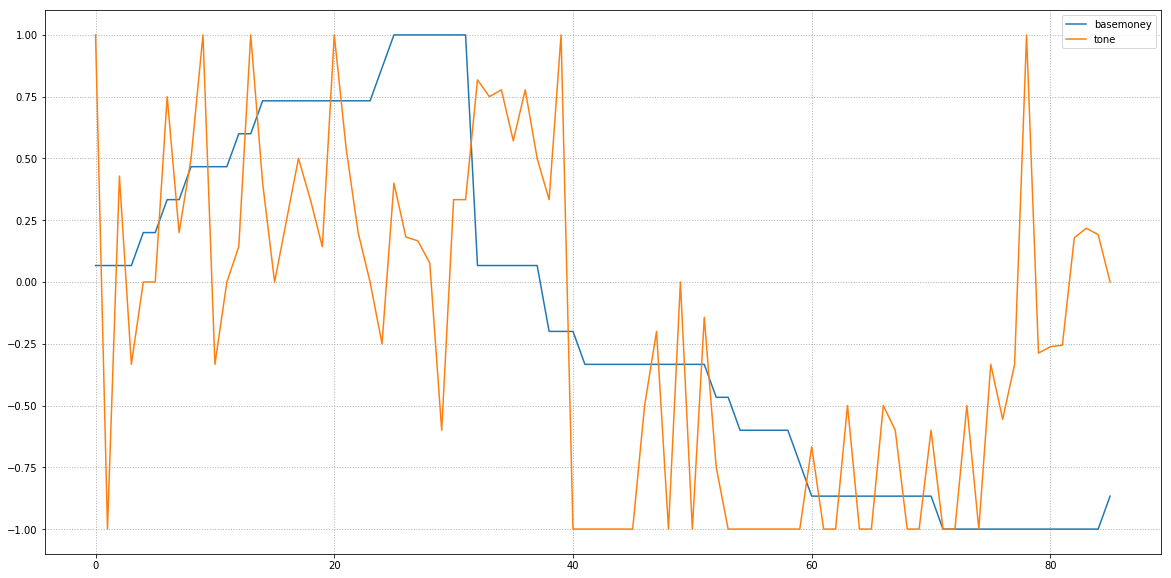

In [124]:
plt.figure(figsize=(20, 10))
plt.plot(forgraph['basemoney'])
plt.plot(forgraph['tone'])
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

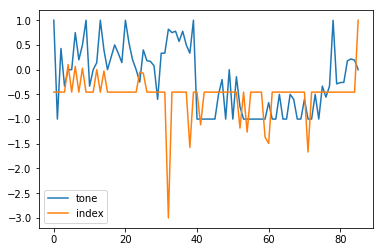

In [117]:
plt.plot(forgraph['tone'])
plt.plot(forgraph['index'])
plt.legend(loc=0)
# forgraph.plot()
plt.show()

# 수작업 기반 데이터
 - re_up, re_down

In [77]:
re_data = data2
re_data['tone'] = 0

count_p = 1
count_n = 1
for i in range(len(re_data)):
    ngrams = re_data.loc[i, 'n-gram'].split(',')
    for ngram in ngrams:
        if ngram in re_up:
            count_p += 1

        if ngram in re_down:
            count_n += 1
        
    re_data.loc[i, 'tone'] = (count_p - count_n) /(count_p + count_n)
    
    if i%100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


In [78]:
re_data.head()

,date,n-gram,tone
0,2005-06-09,"엔달러/NNG;환율/NNG;상승/NNG, 기대/NNG;원화/NNG;절상/NNG, 통...",0.333333
1,2005-06-09,"원엔/NNG;환율/NNG;하락/NNG, 일시적/VAX;외부충격/NNG, 하락/NNG...",0.333333
2,2005-06-09,"유로존/NNG;경제/NNG;성장/NNG, 실적/NNG;예상/NNG;저조/NNG, 전...",0.500000
3,2005-06-09,"자본/NNG;유출/NNG;확대/NNG, 금리/NNG;상승/NNG, 원화/NNG;강세...",0.600000
4,2005-06-09,"가계/NNG;대출/NNG;증가/NNG, 주택담보대출/NNG;증가/NNG, 주택가격/...",0.600000


In [79]:
re_data[re_data['tone']<0]

,date,n-gram,tone
55,2005-11-10,"안정성/NNG;확보/NNG, 세계/NNG, 경제/NNG, 글로벌/NNG, 진전/NN...",-0.043478
56,2005-11-10,"부동산/NNG;거품/NNG, 대해/VV, 외국인/NNG, 주식비중/NNG, 높/VA...",-0.043478
57,2005-11-10,"경제/NNG, 무역/NNG, 기조/NNG, 기조/NNG, 성장률/NNG, 통화/NN...",-0.043478
58,2005-11-10,"원화/NNG;환율/NNG;상승/NNG, 높/VA;우려/NNG, 외국환거래법/NNG,...",-0.043478
59,2005-11-10,"경상/NNG;수지/NNG;적자/NNG, 물가/NNG;안정/NNG, 대해/VV, 거시...",-0.043478
60,2005-11-10,"또/MAG, 세계/NNG, 경제/NNG, 불균형/NNG, 시정/NNG, 국제기구/N...",-0.043478
61,2005-11-10,"어음/NNG, 부도/NNG, 업체/NNG, 수/NNG, 어음/NNG, 부도율/NNG...",-0.043478
63,2005-12-08,"신흥국/NNG;통화/NNG;강세/NNG, 원화/NNG;상승/NNG, 외환/NNG, ...",-0.040000
66,2005-12-08,"채권/NNG;수요/NNG;감소/NNG, 콜/NNG;금리/NNG;인상/NNG, 장기/...",-0.037037
72,2005-12-08,"대출/NNG;금리/NNG;소폭/MAG;상승/NNG, 금리/NNG;소폭/MAG;상승/...",-0.034483


In [82]:
a = pd.read_csv('news_token.csv')
a

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,date,news_media,text,title,url,ngrams,token
0,0,0,2006.01.09,연합인포맥스,9일 뉴욕채권시장에서 미국 국채가격은 연 방준비제도이사회(FRB)의 금리정책 동향...,"美 국채가, 보합권 등락",https://news.naver.com/main/read.nhn?mode=LSD&...,"['주택시장/NNG;냉각/NNG', '예상/NNG;강화/NNG', '금리/NNG;오...","뉴욕/NNG,채권시장/NNG,국채/NNG,가격/NNG,fed/NNG,fed/NNG,..."
1,1,1,2006.01.03,연합인포맥스,민간경제연구소인 DIW가 독일의 올해 경제 성장률 전망치를 1.7%로 상향조정했다...,"DIW, 獨 경제 성장률 전망치 1.7%로 상향",https://news.naver.com/main/read.nhn?mode=LSD&...,"['수출/NNG;증가/NNG', '지출/NNG;확대/NNG']","민간/NNG,경제/NNG,성장률/NNG,전망/NNG,치를/XSV,상향/NNG,하/V..."
2,2,2,2006.01.23,연합인포맥스,윌리엄 풀 세인트루이스연방준비은행 총재 는 23일 지난 6개월 전보다 물가에 대한...,"세인트루이스연銀 총재, 금리인상 조기 중단 가능성 시사",https://news.naver.com/main/read.nhn?mode=LSD&...,"['물가/NNG;우려/NNG;완화/NNG', '인플레이션/NNG;안정/NNG', '...","전/NNG,물가/NNG,우려/NNG,완화/NNG,되/VV,fed/NNG,fed/NN..."
3,3,3,2006.01.23,연합인포맥스,23일 뉴욕환시에서 미국 달러화는 연방준 비제도이사회(FRB)의 금리인상이 마무리...,"美달러, 금리인상 마무리단계 진입 전망 급락",https://news.naver.com/main/read.nhn?mode=LSD&...,"['fed/NNG;금리/NNG;인상/NNG', '유가/NNG;급등/NNG;약세/NN...","뉴욕/NNG,환시/NNG,달러/NNG,fed/NNG,fed/NNG,금리/NNG,인상..."
4,4,4,2006.01.24,연합인포맥스,24일 뉴욕환시에서 미국 달러화는 단기급 락에 따른 저가매수세가 일어 유로화에 대...,"美달러, 단기급락 따른 매수세로 유로화에 소폭 상승",https://news.naver.com/main/read.nhn?mode=LSD&...,"['fed/NNG;금리/NNG;인상/NNG', '높/VA;분위기/NNG;확산/NNG...","뉴욕/NNG,환시/NNG,달러/NNG,단기/NNG,급락/NNG,따르/VV,매수/NN..."
5,5,5,2006.01.13,연합인포맥스,' () (서울=연합인포맥스) 13일 아시아 주요 증시는 일본과 홍콩은 상승했고 ...,[亞증시-종합] 日.홍콩 상승,https://news.naver.com/main/read.nhn?mode=LSD&...,"['미/NNG;금리/NNG;인상/NNG;중단/NNG', '수익성/NNG;악화/NNG...","증시/NNG,상승/NNG,하/VV,하락/NNG,하/VV,경제/NNG,지표/NNG,부..."
6,6,6,2006.01.03,연합인포맥스,유로존 12개국의 12월 제조업 구매관리자지수 (PMI)가 전문가들의 예상치를 웃...,유로존 12월 제조업 PMI 53.6으로 상승..예상치 상회,https://news.naver.com/main/read.nhn?mode=LSD&...,"['제조업/NNG;pmi/NNG;예상/NNG;웃돌/VV', '경기/NNG;확장/NN...","유로존/NNG,제조업/NNG,pmi/NNG,pmi/NNG,예상/NNG,웃돌/VV,호..."
7,7,7,2006.01.23,연합인포맥스,미국의 현재 경상적자는 유지되기 어려운 수 준이라고 티모시 가이스너 뉴욕 연방준비...,"美 경상적자, 유지 불가능 수준 [뉴욕연준총재]",https://news.naver.com/main/read.nhn?mode=LSD&...,"['세계/NNG;경제/NNG;성장/NNG', '경제/NNG;성장/NNG;저해/NNG...","경상/NNG,적자/NNG,유지/NNG,되/XSV,어렵/VA,준이/NNG,뉴욕/NNG..."
8,8,8,2006.01.23,연합인포맥스,' () (서울=연합인포맥스) 달러화가 주요 통화에 대해 큰 폭 하락세를 진행하고...,달러↓1엔 114.24엔..유로-달러 ↑0.015달러 1.2285달러(19:57),https://news.naver.com/main/read.nhn?mode=LSD&...,"['미/NNG;금리/NNG;인상/NNG;중단/NNG', '유가/NNG;상승/NNG']","달러/NNG,통화/NNG,대해/VV,크/VA,하락/NNG,진행/NNG,하/XSV,달..."
9,9,9,2006.01.13,연합인포맥스,13일 국채선물시장은 금통위 후 강세 기조를 이어갔다. 그러나 거래량과 상승폭에서...,[국채선물-마감] '금통위 호재' 조심스레 지속..↑10틱,https://news.naver.com/main/read.nhn?mode=LSD&...,"['국채선물시장/NNG;미/NNG;국채/NNG;금리/NNG;하락/NNG', '국채/...","국채선물시장/NNG,강세/NNG,기조/NNG,이/VV,가/VV,거래/NNG,상승/N..."


# callfinished_copy

In [ ]:
last = pd.read_csv('')